In [1]:
#%% Libraries
import pandas as pd
import warnings
import pandas as pds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import resample
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_selection import RFECV as RFECV_SKYLEARN
pd.options.display.max_columns = 100
#pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Audio, display
def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

# Explore

In [93]:
#%% Explore
albert = pd.read_csv('C:/Users/user/Documents/1. GitHub/Albert_Einstein/data.csv')
print(albert.columns)
print(albert.shape)
print(albert.isnull().value_counts())
print(albert.info())

albert.head(5)

Index(['x1', 'x2', 'x3', 'target'], dtype='object')
(10000, 4)
x1     x2     x3     target
False  False  False  False     10000
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  float64
 2   x3      10000 non-null  float64
 3   target  10000 non-null  object 
dtypes: float64(3), object(1)
memory usage: 312.6+ KB
None


,x1,x2,x3,target
0,2.71,10.39,-36.45,med
1,9.88,5.76,-54.63,med
2,82.87,1.73,0.83,med
3,12.99,10.40,-59.60,med
4,60.10,8.84,-45.87,med


In [94]:
# Order categories
categories = pd.Categorical(albert['target'], categories=['low', 'med', 'high'], ordered=True)
categories
# Label your target with numerical values
labels, unique = pd.factorize(categories, sort=True)
albert['target'] = labels
albert['target'].value_counts()
#albert.groupby(['target']).count()

albert

['med', 'med', 'med', 'med', 'med', ..., 'high', 'high', 'high', 'high', 'high']
Length: 10000
Categories (3, object): ['low' < 'med' < 'high']

0    6000
2    3000
1    1000
Name: target, dtype: int64

,x1,x2,x3,target
0,2.71,10.39,-36.45,1
1,9.88,5.76,-54.63,1
2,82.87,1.73,0.83,1
3,12.99,10.40,-59.60,1
4,60.10,8.84,-45.87,1
...,...,...,...,...
9995,65.03,13.47,-28.30,2
9996,62.24,7.42,-50.47,2
9997,45.37,3.68,-33.13,2
9998,-1.97,6.07,-28.04,2


In [88]:
albert.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,10000.0,42.669613,25.597848,-19.50,21.675,42.940,64.135,101.52
x2,10000.0,9.023236,5.180151,0.17,5.260,8.075,11.730,43.08
x3,10000.0,-24.603198,20.138584,-59.98,-41.920,-24.555,-7.080,9.99
target,10000.0,0.700000,0.900045,0.00,0.000,0.000,2.000,2.00


,x1,x2,x3
target,,,
0,6000,6000,6000
1,1000,1000,1000
2,3000,3000,3000


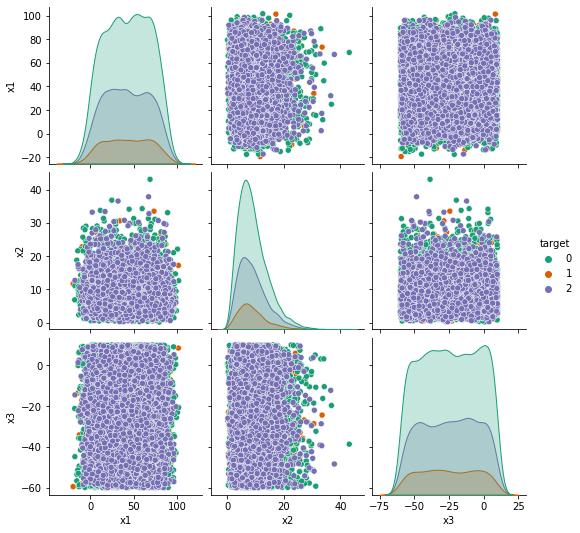

In [6]:
import seaborn as sns
sns.pairplot(albert, hue='target', palette='Dark2')
plt.savefig('C:/Users/user/Documents/1. GitHub/Albert_Einstein/pairplot1.png')

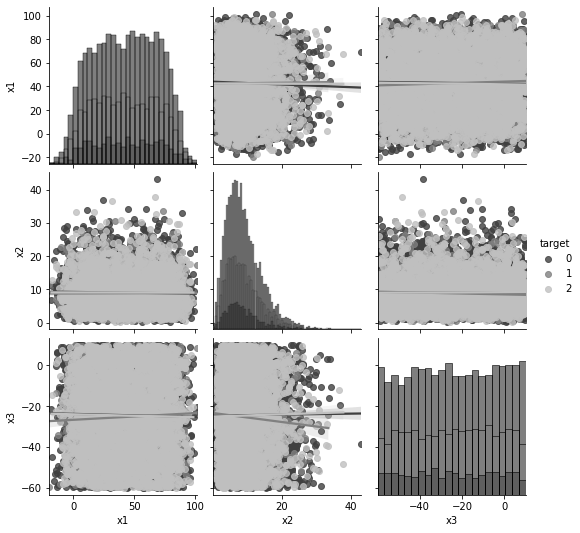

In [7]:
sns.pairplot(albert,hue = 'target',diag_kind = 'hist',kind = 'reg',palette = 'binary_r')
plt.savefig('C:/Users/user/Documents/1. GitHub/Albert_Einstein/pairplot2.png')

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

<Figure size 576x864 with 0 Axes>

Text(0.5, 1.0, 'Features Correlating with target')

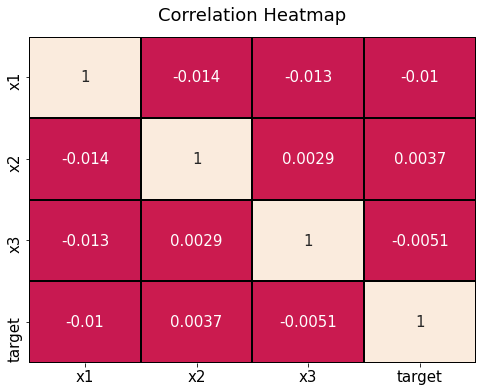

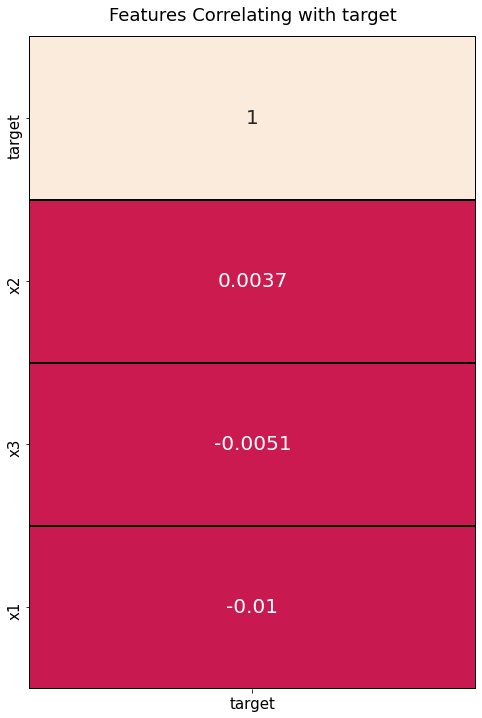

In [8]:
# Increase the size of the heatmap.
plt.figure(figsize=(8, 6))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap1 = sns.heatmap(albert.corr(), vmin=-1, vmax=1, annot=True, linewidths=2, linecolor='black', annot_kws={"size": 15}, cbar=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap1.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
heatmap1.tick_params(labelsize=15)
plt.savefig('C:/Users/user/Documents/1. GitHub/Albert_Einstein/heatmap1.png')

plt.figure(figsize=(8, 12))
heatmap2 = sns.heatmap(albert.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, linewidths=2, linecolor='black', annot_kws={"size": 20}, cbar=False) #, cmap='BrBG')
heatmap2.set_title('Features Correlating with target', fontdict={'fontsize':18}, pad=16)
heatmap2.tick_params(labelsize=15)
plt.savefig('C:/Users/user/Documents/1. GitHub/Albert_Einstein/heatmap2.png')

In [9]:
from pandas_profiling import ProfileReport
profile = ProfileReport(albert, title="albert", explorative=True)

profile.to_widgets()
#profile.to_notebook_iframe()
profile.to_file("C:/Users/user/Documents/1. GitHub/Albert_Einstein/albert_report.html")

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Model

In [6]:
#Open File
albert = pd.read_csv('C:/Users/user/Documents/1. GitHub/Albert_Einstein/data.csv')
# Order categories
categories = pd.Categorical(albert['target'], categories=['low', 'med', 'high'], ordered=True)
categories
# Label your target with numerical values
labels, unique = pd.factorize(categories, sort=True)
albert['target'] = labels

['med', 'med', 'med', 'med', 'med', ..., 'high', 'high', 'high', 'high', 'high']
Length: 10000
Categories (3, object): ['low' < 'med' < 'high']

[07:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "num_classes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[07:51:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=6, num_classes=9, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

   feature  importance
1      x1       17226
0      x3       16623
2      x2       14448


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

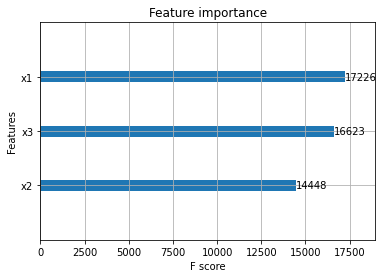





SEE YOUR RMSE SCORE: 1.253927
SEE YOUR RMSEL SCORE: 0.697694 

SEE YOUR F1_weight SCORE: 0.474525
SEE YOUR F1_macro SCORE: 0.320860
SEE YOUR F1_micro SCORE: 0.512667 

XGB's accuracy score: 0.5126666666666667


<Figure size 360x360 with 0 Axes>

In [8]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Set your variables, separating your target from the rest of the features
X = albert[['x1', 'x2', 'x3']]
y = albert['target']
data_dmatrix = xgb.DMatrix(data=X,label=y)

#Split test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
clf = xgb.XGBClassifier(max_depth=5, objective='multi:softmax', n_estimators=1000, importance_type='gain', 
                        num_classes=9)

# Fit Model
clf.fit(X_train, y_train)  

# Choose Features by Importance
xgb_fea_imp=pd.DataFrame(list(clf.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)
xgb_fea_imp.to_csv('xgb_fea_imp.csv')
# Plot Importance
from xgboost import plot_importance
xgb.plot_importance(clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()
plt.savefig('C:/Users/user/Documents/1. GitHub/Albert_Einstein/features_score.png')

# See your prediction score
preds = clf.predict(X_test)
accuracy = accuracy_score(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmsle = np.sqrt(mean_squared_log_error( y_test, preds))
F1_weight = f1_score(y_test, preds, average='weighted')
F1_macro = f1_score(y_test, preds, average='macro')
F1_micro = f1_score(y_test, preds, average='micro')
print("\n\n\n\nSEE YOUR RMSE SCORE: %f" % (rmse))
print("SEE YOUR RMSEL SCORE: %f" % (rmsle), "\n")
print("SEE YOUR F1_weight SCORE: %f" % (F1_weight))
print("SEE YOUR F1_macro SCORE: %f" % (F1_macro))
print("SEE YOUR F1_micro SCORE: %f" % (F1_micro),"\n" )
print("XGB's accuracy score: {}".format(accuracy))

In [79]:
# Describe your score
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 50, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="logloss", as_pandas=True, seed=123)
cv_results.head()
print((cv_results["test-logloss-mean"]).tail(1))

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()
print((cv_results["test-rmse-mean"]).tail(1))

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmsle", as_pandas=True, seed=123)
cv_results.head()

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="mae", as_pandas=True, seed=123)
cv_results.head()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.677632,0.000523,0.678158,0.002154
1,0.664979,0.000882,0.666014,0.004174
2,0.654679,0.001225,0.656016,0.006038
3,0.646232,0.001572,0.647921,0.007796
4,0.639128,0.001778,0.641391,0.009381


18    0.619537
Name: test-logloss-mean, dtype: float64


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.917738,0.001687,0.917752,0.015513
1,0.914298,0.001589,0.914457,0.015076
2,0.911502,0.001514,0.911749,0.014669
3,0.909220,0.001460,0.909566,0.014303
4,0.907310,0.001446,0.907815,0.013974


18    0.902064
Name: test-rmse-mean, dtype: float64


,train-rmsle-mean,train-rmsle-std,test-rmsle-mean,test-rmsle-std
0,0.501322,0.000559,0.501387,0.00467


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.803861,0.001685,0.803968,0.014153


In [13]:
# Hyperarameters
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

param_grid = {
"max_depth": [3, 4, 7, 10, 25],
"gamma": [0.5, 1, 5, 10, 25],
"min_child_weight": [1, 3, 5, 10, 25],
"reg_lambda": [5, 10, 50, 100, 300],
"scale_pos_weight": [1, 3, 5, 10, 25]
}
# Grid Search CV implementation
xgb_cl = xgb.XGBClassifier(objective='multi:softmax')
grid_cv = GridSearchCV(xgb_cl, param_grid, scoring='f1_macro', n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)
# Return set of parameters with the best performance
grid_cv.best_params_
# Return the performance metric score
grid_cv.best_score_
allDone()

[02:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,

{'gamma': 0.5,
 'max_depth': 25,
 'min_child_weight': 10,
 'reg_lambda': 5,
 'scale_pos_weight': 1}

0.3138993734964866

In [10]:
import xgboost
from xgboost import XGBClassifier
import shap
import eli5
import numpy
import numpy.core.multiarray as multiarray

#Test new model
xgb = XGBClassifier(n_estimators=100, max_depth=25, importance_type='gain' 
                    , colsample_bytree=0.3, gamma=0.5, min_child_weight=10, reg_lambda= 5, scale_pos_weight= 1)
                    #, multi_class = 'ovo')
xgb.fit(X_train, y_train)


explainer = shap.TreeExplainer(xgb)
explainer

# See your prediction score
preds = xgb.predict(X_test)
accuracy = accuracy_score(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmsle = np.sqrt(mean_squared_log_error( y_test, preds))
F1_weight = f1_score(y_test, preds, average='weighted')
F1_macro = f1_score(y_test, preds, average='macro')
F1_micro = f1_score(y_test, preds, average='micro')
print("\n\n\n\nSEE YOUR RMSE SCORE: %f" % (rmse))
print("SEE YOUR RMSEL SCORE: %f" % (rmsle), "\n")
print("SEE YOUR F1_weight SCORE: %f" % (F1_weight))
print("SEE YOUR F1_macro SCORE: %f" % (F1_macro))
print("SEE YOUR F1_micro SCORE: %f" % (F1_micro),"\n" )
print("XGB's accuracy score: {}".format(accuracy))

[08:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=25,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)





SEE YOUR RMSE SCORE: 1.197915
SEE YOUR RMSEL SCORE: 0.669176 

SEE YOUR F1_weight SCORE: 0.478193
SEE YOUR F1_macro SCORE: 0.295093
SEE YOUR F1_micro SCORE: 0.561000 

XGB's accuracy score: 0.561


In [32]:
import xgboost
from xgboost import XGBClassifier
import shap
import eli5
import numpy
import numpy.core.multiarray as multiarray
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Describe your score
#params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
#                'max_depth': 50, 'alpha': 10}

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 25, 'alpha': 10, 'gamma':0.5, 'min_child_weight':10, 'reg_lambda': 5, 'scale_pos_weight': 1}

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


#n_estimators=100, max_depth=25, importance_type='gain', colsample_bytree=0.3, gamma=0.5, min_child_weight=10, reg_lambda= 5, scale_pos_weight= 1
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="logloss", as_pandas=True, seed=123)
cv_results.head()
print((cv_results["test-logloss-mean"]).tail(1))

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()
print((cv_results["test-rmse-mean"]).tail(1))

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmsle", as_pandas=True, seed=123)
cv_results.head()

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="mae", as_pandas=True, seed=123)
cv_results.head()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.677692,0.000540,0.678110,0.002107
1,0.665147,0.000835,0.665907,0.004088
2,0.654820,0.001260,0.655893,0.006001
3,0.646417,0.001599,0.647766,0.007784
4,0.639369,0.001776,0.641220,0.009355


16    0.618485
Name: test-logloss-mean, dtype: float64


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.917757,0.001677,0.917739,0.015519
1,0.914344,0.001604,0.914427,0.015106
2,0.911540,0.001497,0.911715,0.014694
3,0.909270,0.001440,0.909523,0.014323
4,0.907377,0.001422,0.907768,0.013995


16    0.901816
Name: test-rmse-mean, dtype: float64


,train-rmsle-mean,train-rmsle-std,test-rmsle-mean,test-rmsle-std
0,0.501335,0.000551,0.501379,0.004671


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.803878,0.001678,0.80396,0.014154


In [ ]:
# Not many improvements after one hour of tuning...

# Predict

In [66]:
# How many randoms?
#randoms = pd.DataFrame(clf.predict_proba(X_test)[:, 1], columns=['prob']).query('0.2 < prob < 0.6 ')
#randoms
#print(randoms.shape)

,prob
4,0.439225
24,0.441930
28,0.202642
39,0.524318
67,0.246530
...,...
2935,0.391026
2975,0.464658
2976,0.480170
2986,0.437147


(214, 1)


In [19]:
# 52 from 10000 is irrelevant

In [80]:
# Get the predictions and put them on the test data.
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(clf.predict(X_output),2)

# Randomly pick some observations
#random_picks = np.arange(1,330,50) # Every 50 rows
predict_table = X_output.iloc[:]
predict_table

,x1,x2,x3,predict
6252,77.72,8.51,-10.55,0
4684,47.72,12.97,-8.43,0
1731,7.81,7.59,6.68,0
4742,44.99,5.95,6.80,2
4521,28.31,7.25,-5.32,0
...,...,...,...,...
8014,4.32,6.72,-56.45,2
1074,60.40,11.88,5.87,0
3063,36.70,4.64,-15.01,0
6487,11.79,6.77,-50.28,2


In [83]:
#%% Predict on your Unseen Data
data = albert.sample(frac=0.95, random_state=786)
data_unseen = albert.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))
data_unseen

# Backup your old column to compare
target_backup = [data_unseen["target"]]
target_backup = pd.DataFrame(target_backup).T
del data_unseen['target']

# Get the predictions and put them with the unseen data.
X_output = data_unseen.copy()
X_output.loc[:,'predict'] = np.round(clf.predict(X_output),2)

# Randomly pick some observations
#random_picks = np.arange(1,330,50) # Every 50 rows
predict_table = X_output.iloc[:]

# Fill your new table with all variables to compare
predict_table['target'] = target_backup
predict_table = predict_table[['x1', 'x2', 'x3', 'target', 'predict']]
# Boolean function for new column
def Check(predict_table):
   if predict_table['target']== predict_table['predict']:
      return "True"
   else:
      return "False" 
# Result
predict_table['result'] = predict_table.apply(Check, axis=1)
predict_table

predict_table['result'].value_counts()

Data for Modeling: (9500, 4)
Unseen Data For Predictions (500, 4)


,x1,x2,x3,target
0,34.86,7.86,-47.64,1
1,15.13,9.67,-37.22,1
2,18.28,3.85,-43.69,1
3,5.50,24.23,-45.81,1
4,76.97,8.30,-25.64,1
...,...,...,...,...
495,9.52,3.59,-19.32,2
496,24.00,5.25,-22.56,2
497,85.92,2.89,-4.30,2
498,22.87,4.84,-9.08,2


,x1,x2,x3,target,predict,result
0,34.86,7.86,-47.64,1,1,True
1,15.13,9.67,-37.22,1,1,True
2,18.28,3.85,-43.69,1,0,False
3,5.50,24.23,-45.81,1,2,False
4,76.97,8.30,-25.64,1,1,True
...,...,...,...,...,...,...
495,9.52,3.59,-19.32,2,2,True
496,24.00,5.25,-22.56,2,2,True
497,85.92,2.89,-4.30,2,2,True
498,22.87,4.84,-9.08,2,2,True


True     424
False     76
Name: result, dtype: int64

In [82]:
# It's good to compare but with parcimony: since it's a hierarchy from low/medium/high, False doesn't always has the same weight;
# *although with the pardon of the obvious: True is always True;

True     424
False     76
Name: result, dtype: int64

# Visualize

In [22]:
import shap
pd.set_option("display.max_columns",None)
shap.initjs()

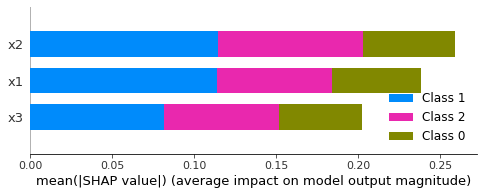

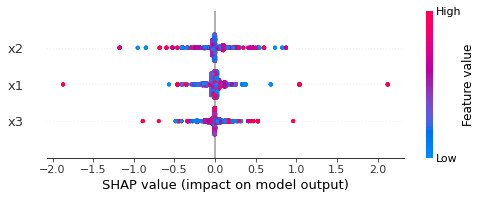

<Figure size 360x360 with 0 Axes>

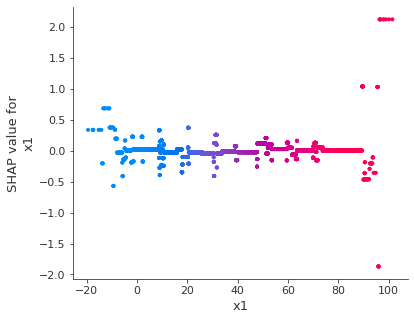

<Figure size 360x360 with 0 Axes>

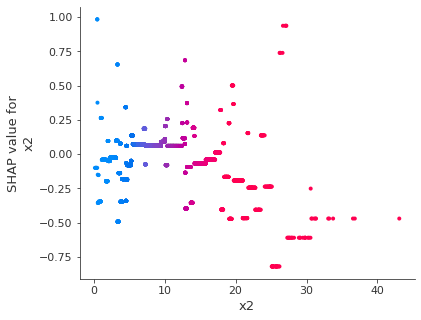

<Figure size 360x360 with 0 Axes>

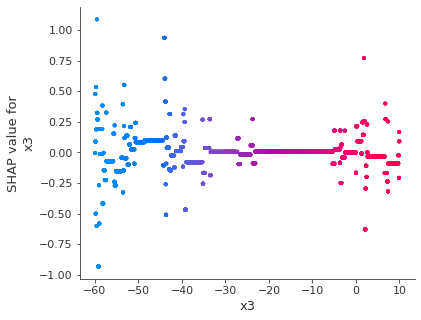

<Figure size 360x360 with 0 Axes>

In [23]:
shap_values = shap.TreeExplainer(xgb).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")
plt.savefig('C:/Users/user/Documents/1. GitHub/Albert_Einstein/shap_feature_train_bar.png')
shap.summary_plot(shap_values[0], X_train)
plt.savefig('C:/Users/user/Documents/1. GitHub/Albert_Einstein/shap_feature_train.png')
shap.dependence_plot('x1', shap_values[0], X_train)
plt.savefig('C:/Users/user/Documents/1. GitHub/Albert_Einstein/shap_dependency_x1_train.png')
shap.dependence_plot('x2', shap_values[1], X_train)
plt.savefig('C:/Users/user/Documents/1. GitHub/Albert_Einstein/shap_dependency_x2_train.png')
shap.dependence_plot('x3', shap_values[2], X_train)
plt.savefig('C:/Users/user/Documents/1. GitHub/Albert_Einstein/shap_dependency_x3_train.png')

In [33]:
import shap
from shap import datasets, KernelExplainer, force_plot, initjs
from scipy.special import softmax, expit
import xgboost
from xgboost import XGBClassifier
import shap
import eli5
import numpy
import numpy.core.multiarray as multiarray
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from shap import datasets, KernelExplainer, force_plot, initjs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn
import shap
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from shap import datasets, KernelExplainer, force_plot, initjs
from scipy.special import softmax, expit
from shap import datasets, KernelExplainer, force_plot, initjs
import xgboost
from xgboost import XGBClassifier
import eli5
import numpy
import numpy.core.multiarray as multiarray
import shap
pd.set_option("display.max_columns",None)
shap.initjs()

params = {"objective":"multi:softmax",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 25, 'alpha': 10, 'gamma':0.5, 'min_child_weight':10, 'reg_lambda': 5, 'scale_pos_weight': 1}

xgb = XGBClassifier(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb.fit(X_train, y_train)

explainer = shap.TreeExplainer(xgb)
explainer

ke = KernelExplainer(xgb.predict_proba, data=X_train)
shap_values = ke.shap_values(X_test)

[11:38:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "dtrain", "num_boost_round", "params" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:38:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              dtrain=<xgboost.core.DMatrix object at 0x000001C26C7D6640>,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimato...
              num_boost_round=10, num_parallel_tree=1,
              objective='multi:softprob',
              params={'alpha': 10, 'colsample_bytree': 0.3, 'gamma': 0.5,
                      'learning_rate': 0.1, 'max_depth': 25,
                      'min_child_weight': 10, 'objective': 'multi:softmax',
                      'reg_lambda': 5, 'scale_pos_weight': 1},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosi

Using 7000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/3000 [00:00<?, ?it/s]

In [34]:
from shap import datasets, KernelExplainer, force_plot, initjs
shap.initjs()
force_plot(ke.expected_value[0], shap_values[1][0], feature_names=X.columns)
force_plot(ke.expected_value[1], shap_values[1][0], feature_names=X.columns)
force_plot(ke.expected_value[2], shap_values[1][0], feature_names=X.columns)

In [35]:
force_plot(ke.expected_value[0], shap_values[0][0], feature_names=X.columns)
force_plot(ke.expected_value[1], shap_values[1][0], feature_names=X.columns)
force_plot(ke.expected_value[2], shap_values[2][0], feature_names=X.columns)

In [36]:
force_plot(ke.expected_value[0], shap_values[1][2999], feature_names=X.columns)

# PyCaret

In [ ]:
#%% Model
from pycaret.classification import *
clf1 = setup(data = albert, target = 'target'
             , silent = True
             , log_experiment = True, experiment_name = 'rain_tomorrow_exp'
             , log_plots = True, log_profile = True, log_data = True
             #, profile = True #, profile_kwargs = True
             , train_size = 0.3
             #, sampling = True
             , numeric_imputation = 'median', categorical_imputation = 'constant'
             , normalize = True, normalize_method = 'zscore'
             , handle_unknown_categorical = True, unknown_categorical_method = 'most_frequent'
             , fix_imbalance = True
             , transformation = True, transformation_method = 'yeo-johnson'
             , combine_rare_levels = True, rare_level_threshold = 0.1
             , feature_selection = True, feature_selection_threshold = 0.8
             , remove_multicollinearity = True, multicollinearity_threshold = 0.95
             , pca = False
             , ignore_low_variance = True
             , fold_strategy = 'stratifiedkfold'
             , fold = 10
             , use_gpu = False
              )

logs = get_logs(save=True)

allDone()




In [ ]:
#%% Unseen Data
data = albert.sample(frac=0.95, random_state=786)
data_unseen = albert.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))

print('Unseen Data For Predictions ' + str(data_unseen.shape))
logs = get_logs(save=True)

allDone()



In [ ]:
#%% Choose Model
top5 = compare_models(n_select = 5, sort = 'Prec.', round = 2)
allDone()
print(top5)
allDone()



best = compare_models(sort = 'AUC')



model = create_model(best,fold = 10)
plot_model(best)



tuned_model = tune_model(best, optimize = 'Prec.', n_iter = 50)
allDone()
plot_model(tuned_model)
allDone()


boosted_tuned_model = ensemble_model(tuned_model, method = 'Boosting', n_estimators = 100)
allDone()
plot_model(boosted_tuned_model)
allDone()
print(boosted_tuned_model.estimators_)
allDone()



calibrated_boosted_tuned_model = calibrate_model(boosted_tuned_model)
allDone()

calibrated_boosted_tuned_model_isotonic = calibrate_model(boosted_tuned_model, method = 'isotonic')
allDone()


plot_model(calibrated_boosted_tuned_model_isotonic, plot='calibration')
allDone()


optimize_threshold(calibrated_boosted_tuned_model, true_negative = 1500, false_negative = -5000)
allDone()


plot_importance(calibrated_boosted_tuned_model, importance_type='gain')
